<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #5: TF-IDF
`Fecha de entrega: Marzo 25, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

# Punto 1: Pre-Procesamiento

- `[9 pts]` Leer el archivo `bob_esponja.csv` usando `pandas`
- `[9 pts]` Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

In [6]:
df = pd.read_csv('C:/Users/CHOMELY/Documents/Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Procesamiento-de-Lenguaje-Natural-NLP-/bob_esponja.csv')
df=pd.DataFrame(df)
df

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


In [7]:
def pre_procesado(texto): #Recibe una cadena de texto y devuelve una cadena de texto
    texto=texto.lower()
    texto=re.sub(r"[\W\d_]+",' ',texto)
    texto=texto.split() #tokenizacion
    texto=[palabra for palabra in texto if palabra not in stopwords_sp]
    texto=" ".join(texto)
    return texto

In [8]:
df['Descripción'] = df['Descripción'].apply(lambda val: pre_procesado(val))
df

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,bob esponja esponja mar forma rectangular colo...
1,Patricio Estrella,estrella mar color rosa mejor amigo bob esponj...
2,Calamardo Tentáculos,calamardo tentáculos personaje principal bob e...
3,Arenita Mejillas,arenita mejillas sandy cheeks inglés personaje...
4,Eugenio H. Cangrejo,don eugenio h cangrejo normalmente llamado señ...
5,Sheldon J. Plankton,sheldon j plankton simplemente plankton dos an...
6,Karen Plankton,karen plankton dos principales antagonistas bo...
7,Perlita Cangrejo,perla perlita cangrejo personaje principal bob...
8,Sra. Puff,señora puff personaje principal bob esponja ma...
9,Gary el Caracol,gary caracol personaje principal bob esponja q...


In [9]:
def pre_procesado1(texto):
    texto=texto.split() 
    texto=[spanishStemmer.stem(palabra) for palabra in texto]
    texto=" ".join(texto)
    return texto

In [10]:
df['pre-procesado'] = df['Descripción'].apply(lambda val: pre_procesado1(val))
df

,Personaje,Descripción,pre-procesado
0,Bob Esponja Pantalones Cuadrados,bob esponja esponja mar forma rectangular colo...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,estrella mar color rosa mejor amigo bob esponj...,estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,calamardo tentáculos personaje principal bob e...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,arenita mejillas sandy cheeks inglés personaje...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,don eugenio h cangrejo normalmente llamado señ...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,sheldon j plankton simplemente plankton dos an...,sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,karen plankton dos principales antagonistas bo...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,perla perlita cangrejo personaje principal bob...,perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,señora puff personaje principal bob esponja ma...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,gary caracol personaje principal bob esponja q...,gary caracol personaj principal bob esponj que...


In [20]:
# Leer archivo

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


In [24]:
# Nueva columna

,Personaje,Descripción,pre-procesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e...",sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,Karen Plankton es uno de los dos principales a...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ...",perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...,gary caracol personaj principal bob esponj que...


# Punto 2: TF-IDF

- `[16 pts]` Crear la matriz TF-IDF

In [11]:
df1=df
df1

,Personaje,Descripción,pre-procesado
0,Bob Esponja Pantalones Cuadrados,bob esponja esponja mar forma rectangular colo...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,estrella mar color rosa mejor amigo bob esponj...,estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,calamardo tentáculos personaje principal bob e...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,arenita mejillas sandy cheeks inglés personaje...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,don eugenio h cangrejo normalmente llamado señ...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,sheldon j plankton simplemente plankton dos an...,sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,karen plankton dos principales antagonistas bo...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,perla perlita cangrejo personaje principal bob...,perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,señora puff personaje principal bob esponja ma...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,gary caracol personaje principal bob esponja q...,gary caracol personaj principal bob esponj que...


In [12]:
df1['pre-procesado'].values

array(['bob esponj esponj mar form rectangul color amarill clar contorn verd oliv clar episodi anterior ancho cerc part superior vuelv delg haci abaj simil trapeci embarg episodi recient form cuadr regul bob esponj por color verd oliv clar hoyuel tres pec cad mejill boc grand dos dient delanter prominent nariz larg liger curv grand ojos azul clar ademas color ojos parec ser maner unic ton azul pacif cerule crayol complement fond azul ocean ademas tres pestañ excepcional anchas expuest afemin cad ojo vec primer plan particul demostr numer pestañ similar human destac mejor don cangrej instructor ve respir dificult prim plan aunqu rar vez ve seri cabell amarill clar va man color piel ve licenci conduc episodi esponj pod vol embarg episodi vide entren crustace cascarud cambi simpl mechon cabell negr general usa camis blanc corbat roj escarlat zapat cuer negr cordon blanc calcetin blanc ray azul roj pantalon rectangular marron cinturon negr mientr trabaj crustace cascarud usa sombrer alto b

In [13]:
df1['Personaje']

0    Bob Esponja Pantalones Cuadrados
1                   Patricio Estrella
2                Calamardo Tentáculos
3                    Arenita Mejillas
4                 Eugenio H. Cangrejo
5                 Sheldon J. Plankton
6                      Karen Plankton
7                    Perlita Cangrejo
8                           Sra. Puff
9                     Gary el Caracol
Name: Personaje, dtype: object

In [14]:
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(df1['pre-procesado'].values)  #Aprende y luego transforma de los aprendiste

tfidf_matrix = pd.DataFrame(tfidf.toarray())
tfidf_matrix.columns = tfidf_vec.get_feature_names()
tfidf_matrix.index = df1['Personaje']

tfidf_matrix = tfidf_matrix.T.round(3)

tfidf_matrix

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,0.049,0.00,0.000,0.000,0.045,0.0,0.000,0.0,0.000,0.000
acept,0.000,0.00,0.000,0.000,0.000,0.0,0.064,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.05,0.060,0.108,0.070,0.0,0.000,0.0,0.000,0.000
vol,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,0.195,0.00,0.000,0.139,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,0.172,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


In [26]:
# tfidf_matrix

,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,0.049,0.00,0.000,0.000,0.045,0.0,0.000,0.0,0.000,0.000
acept,0.000,0.00,0.000,0.000,0.000,0.0,0.064,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.05,0.060,0.108,0.070,0.0,0.000,0.0,0.000,0.000
vol,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,0.195,0.00,0.000,0.139,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,0.172,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


# Punto 3: Distancia del coseno
- `[12 pts]` Calcular la distancia del coseno entre cada una de los personajes
- `[2 pts]` ¿Cuáles son los personajes más parecidos?
- `[2 pts]` ¿Cuáles son los personajes más diferentes?

In [15]:
dist_cos=cosine_distances(tfidf_matrix.T.values) #Distancia del conseno: Mide el ángulo que exite entre dos vectores
dist_cos=pd.DataFrame(dist_cos, columns=tfidf_matrix.columns, index=tfidf_matrix.columns)
dist_cos 

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
Personaje,,,,,,,,,,
Bob Esponja Pantalones Cuadrados,0.000000,0.826052,0.918644,0.838317,0.868204,0.872076,0.938609,0.885810,0.858077,0.924158
Patricio Estrella,0.826052,0.000000,0.790530,0.841122,0.831634,0.966449,0.930045,0.891502,0.952583,0.894790
Calamardo Tentáculos,0.918644,0.790530,0.000000,0.919857,0.831344,0.917606,0.949913,0.967265,0.968111,0.851644
Arenita Mejillas,0.838317,0.841122,0.919857,0.000000,0.908202,0.967774,0.948323,0.962015,0.972120,0.900641
Eugenio H. Cangrejo,0.868204,0.831634,0.831344,0.908202,0.000000,0.687380,0.891897,0.796723,0.896080,0.920664
Sheldon J. Plankton,0.872076,0.966449,0.917606,0.967774,0.687380,0.000000,0.794981,0.922577,0.986733,0.969239
Karen Plankton,0.938609,0.930045,0.949913,0.948323,0.891897,0.794981,0.000000,0.966088,0.984919,0.965252
Perlita Cangrejo,0.885810,0.891502,0.967265,0.962015,0.796723,0.922577,0.966088,0.000000,0.873832,0.969504
Sra. Puff,0.858077,0.952583,0.968111,0.972120,0.896080,0.986733,0.984919,0.873832,0.000000,0.964177


In [36]:
# dist_cos

,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
Bob Esponja Pantalones Cuadrados,0.000000,0.826052,0.918644,0.838317,0.868204,0.872076,0.938609,0.885810,0.858077,0.924158
Patricio Estrella,0.826052,0.000000,0.790530,0.841122,0.831634,0.966449,0.930045,0.891502,0.952583,0.894790
Calamardo Tentáculos,0.918644,0.790530,0.000000,0.919857,0.831344,0.917606,0.949913,0.967265,0.968111,0.851644
Arenita Mejillas,0.838317,0.841122,0.919857,0.000000,0.908202,0.967774,0.948323,0.962015,0.972120,0.900641
Eugenio H. Cangrejo,0.868204,0.831634,0.831344,0.908202,0.000000,0.687380,0.891897,0.796723,0.896080,0.920664
Sheldon J. Plankton,0.872076,0.966449,0.917606,0.967774,0.687380,0.000000,0.794981,0.922577,0.986733,0.969239
Karen Plankton,0.938609,0.930045,0.949913,0.948323,0.891897,0.794981,0.000000,0.966088,0.984919,0.965252
Perlita Cangrejo,0.885810,0.891502,0.967265,0.962015,0.796723,0.922577,0.966088,0.000000,0.873832,0.969504
Sra. Puff,0.858077,0.952583,0.968111,0.972120,0.896080,0.986733,0.984919,0.873832,0.000000,0.964177
Gary el Caracol,0.924158,0.894790,0.851644,0.900641,0.920664,0.969239,0.965252,0.969504,0.964177,0.000000


# ¿Cuáles son los personajes más parecidos?

Los personajes más parecidos son aquellos con menor distancia, por tanto Eugenio H, Cangrejo y Sheldon J, Plankton son los más parecidos con una distancia conseno de 0.687380, seguidos de Calamardo Tentáculos y Patricio Estrella con 0.790530.

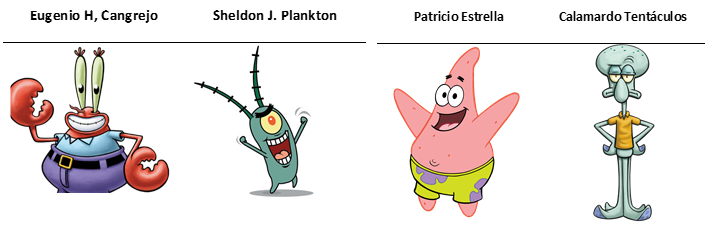

# ¿Cuáles son los personajes más diferentes?

Los personajes más diferentes son aquellos que tienen distancia coseno cercana a 1, por tanto y de acuerdo con el data.frame los personajes que menos se parecen son Sra. Puff y Sheldon J. Plankton con una distancia de 0.986733 y Karen Plankton y Sra, Puff con una distancia de 0.984919.

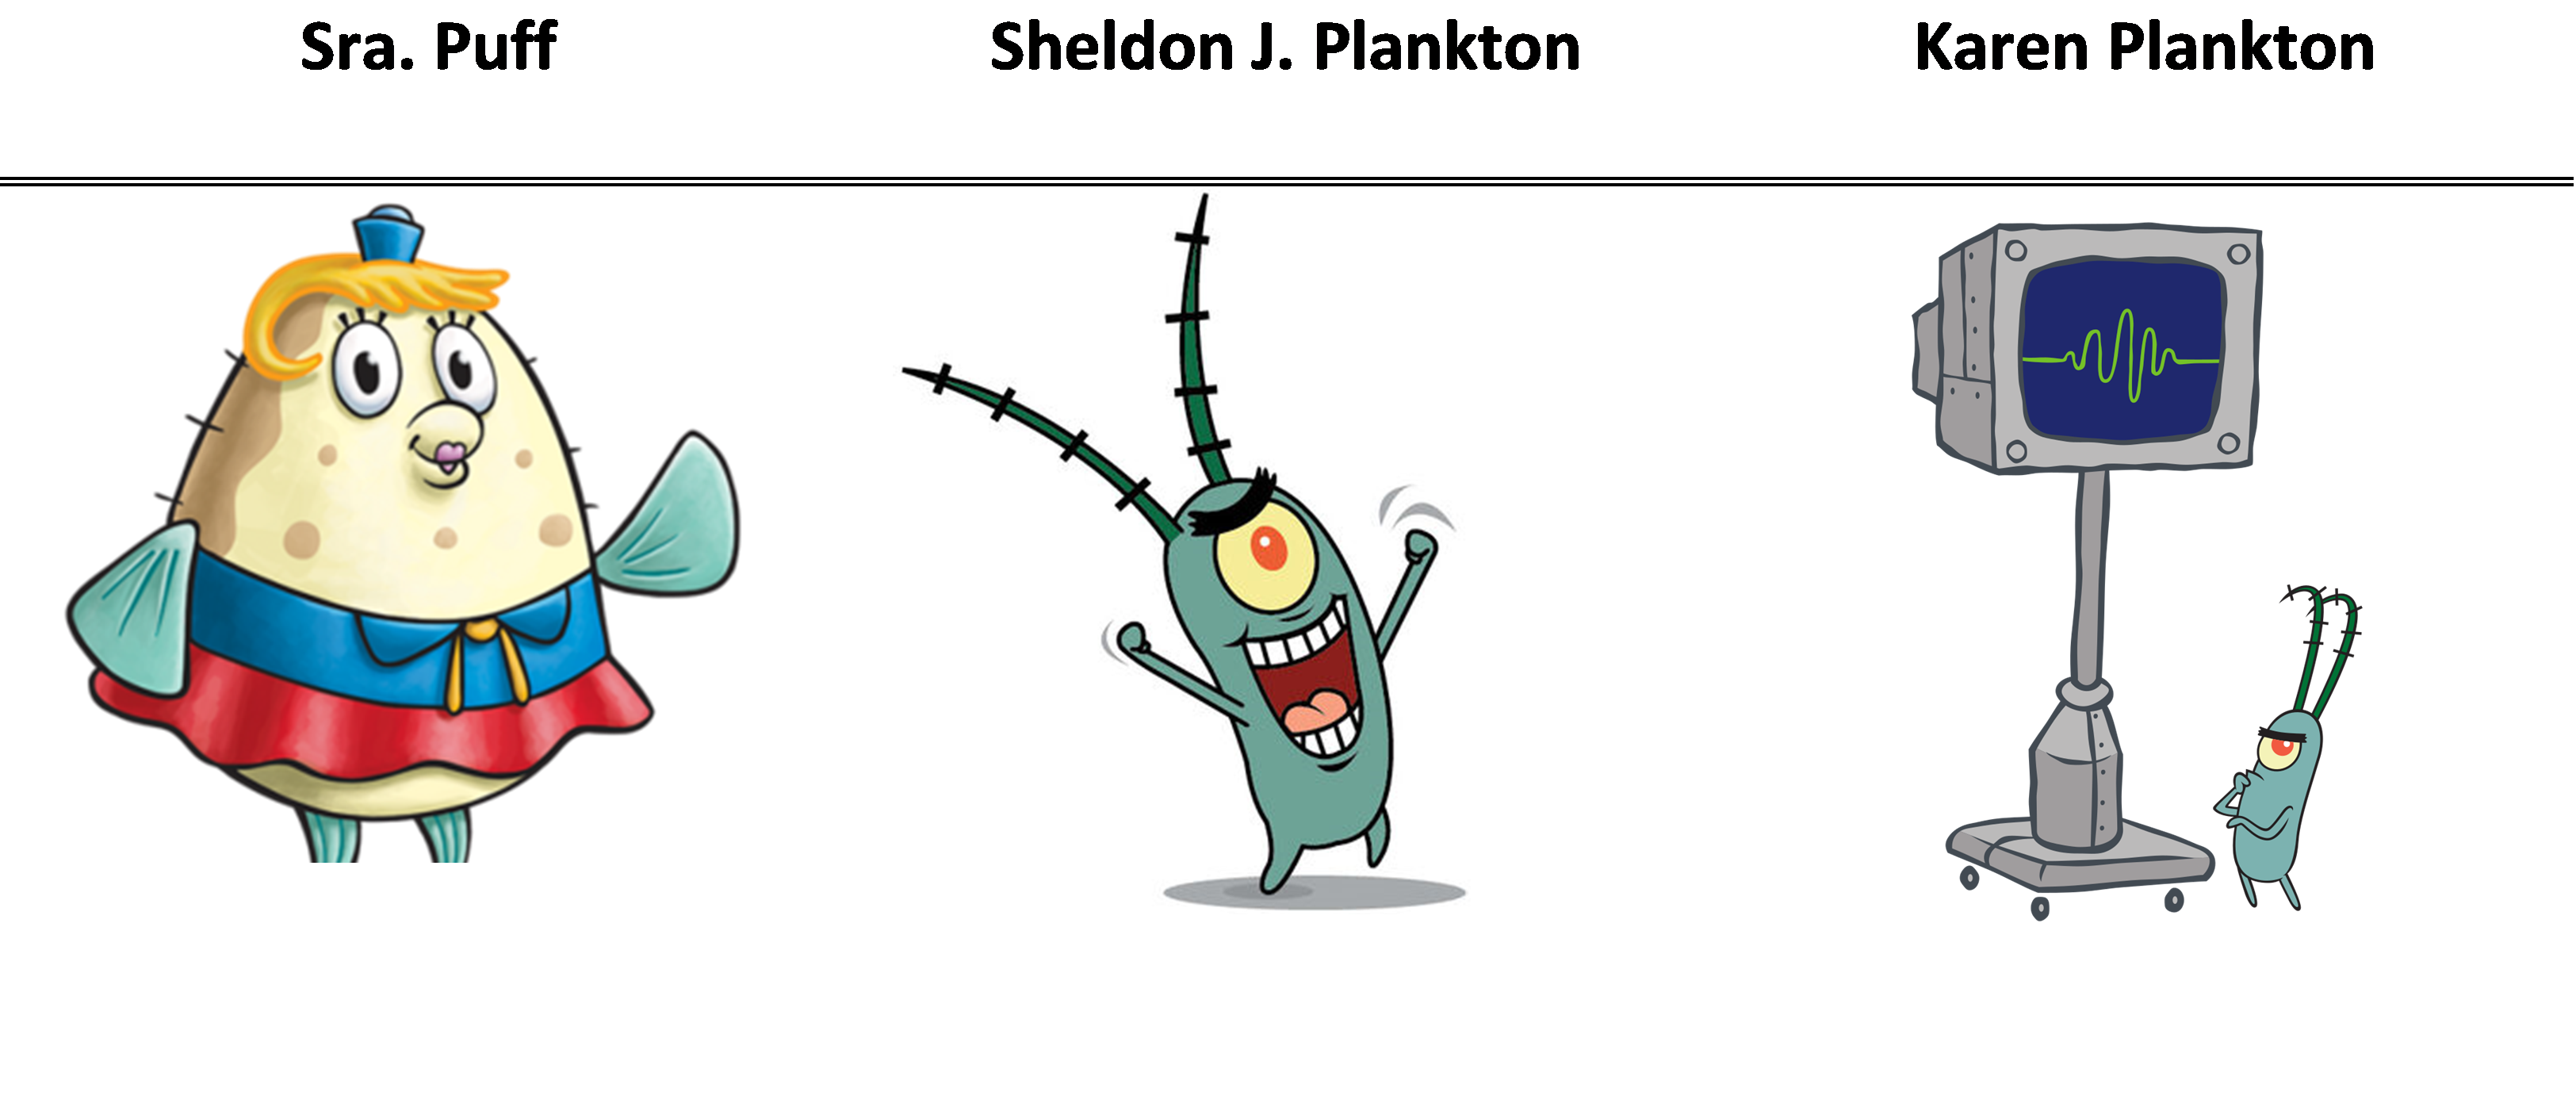

👩‍💻 Julieth Andrea Murte Tavera